In [2]:
import pandas as pd
import itertools as it
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
a = 'ACTG'
k = 4

In [ ]:
def count_kmers(read, k):
    kmer_dict = {}
    for output in it.product(a, repeat=k):
        kmer_dict["".join(output)]=0
    num_kmers = len(read) - k + 1
    for i in range(num_kmers):
        kmer = read[i:i+k]
        if "N" not in kmer:
            kmer_dict[kmer] += 1
    return kmer_dict

In [83]:
contig_dict = {}
with open('/home/Maxim/Bioinformatics/long_read_WGS/Kent_worm/2_B01/assemblies/IPA_assemblies/CW3/final.p_ctg.fasta') as fasta_file:  # Will close handle cleanly
    identifiers = []
    lengths = []
    sequences = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        lengths.append(len(seq_record.seq))
        sequences.append(seq_record.seq)
        contig_dict[seq_record.id] = seq_record.seq

In [ ]:
kmer_df_joined = pd.DataFrame()
counter = 0
for contig_id, seq in contig_dict.items():
    kmer_df = pd.DataFrame(data = [[contig_id, "".join(seq), len("".join(seq))]], columns = ["ID", "sequence", "length"])
    kmer_df = kmer_df.join(pd.DataFrame.from_dict([count_kmers(seq, k)]))
    kmer_df_joined = pd.concat([kmer_df_joined,kmer_df])
    counter += 1
    print("Processed contig ", counter, "/", len(contig_dict))
kmer_df_joined = kmer_df_joined.reset_index(drop=True)

In [119]:
kmer_df_joined.to_csv("./contig_kmer_counts.csv")
kmer_df_joined.drop(columns=["sequence"]).to_csv("./contig_kmer_counts_no_seq.csv")

In [124]:
pca = PCA(n_components = 3)

In [131]:
kmer_df_joined.iloc[:,3:]

,AAAA,AAAC,AAAT,AAAG,AACA,AACC,AACT,AACG,AATA,AATC,...,GGCT,GGCG,GGTA,GGTC,GGTT,GGTG,GGGA,GGGC,GGGT,GGGG
0,1319,618,1087,654,745,281,460,285,828,528,...,269,188,284,233,306,362,281,174,237,232
1,344,155,279,244,248,60,111,103,336,175,...,63,78,56,92,90,87,51,49,65,60
2,1753,817,1311,715,699,517,570,368,948,670,...,249,215,291,225,363,237,239,154,236,260
3,990,535,929,515,544,294,414,290,760,391,...,190,162,170,202,249,204,134,94,135,119
4,1419,647,1074,811,664,414,450,275,709,501,...,327,380,379,262,327,328,302,209,270,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,5835,3121,4856,3116,3328,1668,2374,1546,4076,2451,...,1429,1162,1466,1446,1795,2040,1408,946,1329,1320
2572,5991,3309,5197,3155,3598,1670,2514,2043,4679,2565,...,1330,1285,1294,1580,1737,1766,1258,1067,1188,1197
2573,4998,3355,4494,2720,3315,3440,2234,1339,3636,2267,...,1224,1026,1078,1164,1481,1267,1109,934,1029,1268
2574,2097,1052,1668,953,968,531,838,518,1659,723,...,510,385,438,498,584,502,374,362,480,602


In [132]:
pca_result = pca.fit_transform(kmer_df_joined.iloc[:,3:].values)

In [133]:
kmer_df_joined['pca-one'] = pca_result[:,0]
kmer_df_joined['pca-two'] = pca_result[:,1]
kmer_df_joined['pca-three'] = pca_result[:,2]

In [134]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.98880522 0.00241326 0.0014085 ]


/tmp/ipykernel_2011473/1125398096.py:2: UserWarning: 
The palette list has fewer values (10) than needed (2576) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


<AxesSubplot: xlabel='pca-one', ylabel='pca-two'>

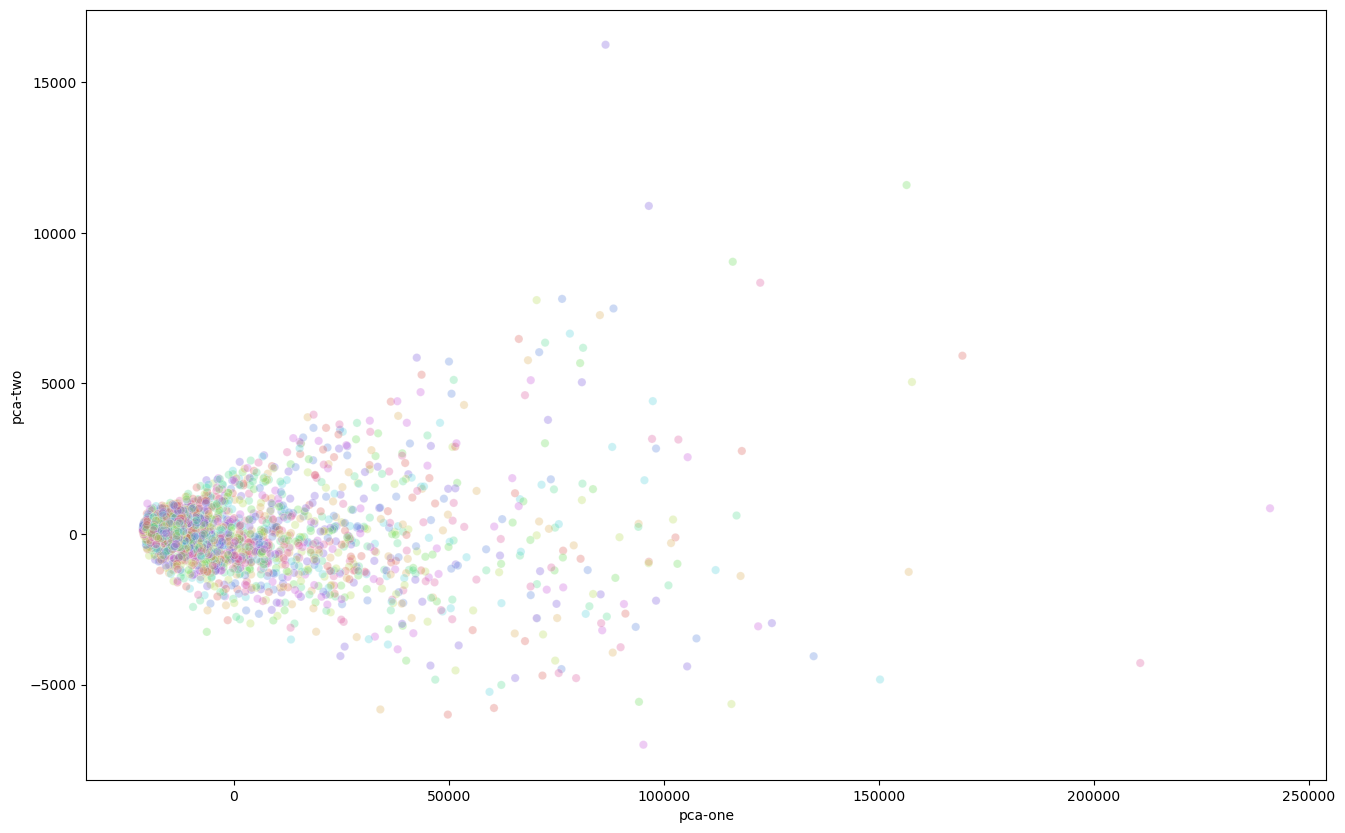

In [156]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="ID",
    palette=sns.color_palette("hls", 10),
    data=kmer_df_joined,
    legend=False,
    alpha=0.3
)

In [157]:
tsne = TSNE(n_components = 3, verbose = 1, perplexity = 200, n_iter = 300)

In [ ]:
tsne_results = tsne.fit_transform(kmer_df_joined.iloc[:,3:].values)

kmer_df_joined['tsne-2d-one'] = tsne_results[:,0]
kmer_df_joined['tsne-2d-two'] = tsne_results[:,1]
kmer_df_joined['tsne-2d-three'] = tsne_results[:,2]

/tmp/ipykernel_2011473/3851615512.py:2: UserWarning: 
The palette list has fewer values (10) than needed (2576) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


<AxesSubplot: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

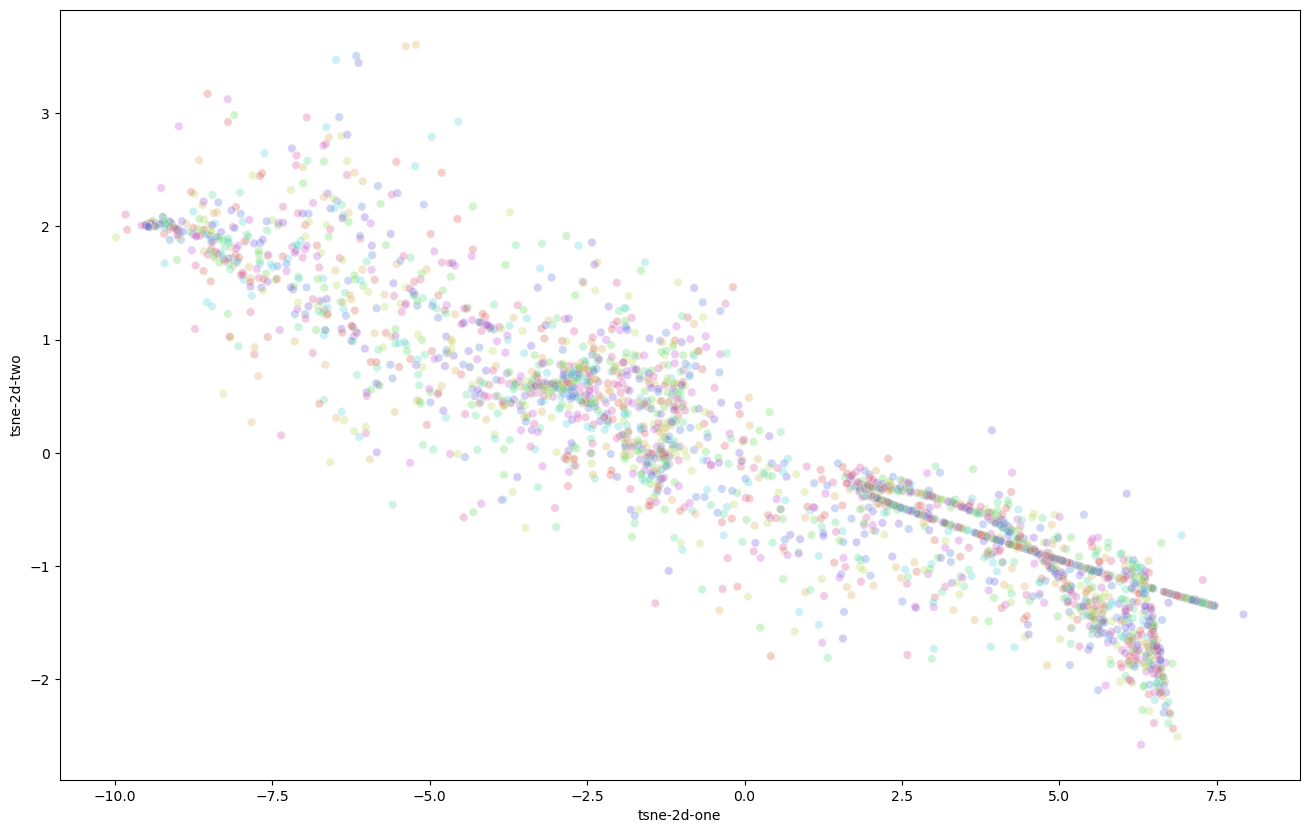

In [160]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="ID",
    palette=sns.color_palette("hls", 10),
    data=kmer_df_joined,
    legend = False,
    alpha=0.3
)

In [ ]:
contig_dict = {}
with open('./CW3.fasta') as fasta_file:  # Will close handle cleanly
    identifiers = []
    lengths = []
    sequences = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        lengths.append(len(seq_record.seq))
        sequences.append(seq_record.seq)
        contig_dict[seq_record.id] = seq_record.seq

In [ ]:
kmer_df_joined_reads = pd.DataFrame()
counter = 0
for contig_id, seq in contig_dict.items():
    kmer_df = pd.DataFrame(data = [[contig_id, len("".join(seq))]], columns = ["ID", "length"])
    kmer_df = kmer_df.join(pd.DataFrame.from_dict([count_kmers(seq, k)]))
    kmer_df_joined_reads = pd.concat([kmer_df_joined_reads,kmer_df])
    counter += 1
    if counter % 45000 == 0:
        kmer_df_joined_reads.to_csv("./reads_kmer_counts.csv")
        print("Processed contig ", counter, "/", len(contig_dict))
kmer_df_joined_reads = kmer_df_joined_reads.reset_index(drop=True)

In [ ]:
#determine GC content for each sequence and use as input

In [14]:
len(dict(it.islice(contig_dict.items(),630000,2438838)))

1808838

In [ ]:
kmer_df_joined_reads = pd.DataFrame()
counter = 0
for contig_id, seq in dict(it.islice(contig_dict.items(),810000,2438838)).items():
    kmer_df = pd.DataFrame(data = [[contig_id, len("".join(seq))]], columns = ["ID", "length"])
    kmer_df = kmer_df.join(pd.DataFrame.from_dict([count_kmers(seq, k)]))
    kmer_df_joined_reads = pd.concat([kmer_df_joined_reads,kmer_df])
    counter += 1
    if counter % 45000 == 0:
        kmer_df_joined_reads.to_csv("./reads_kmer_counts_810001.csv")
        print("Processed contig ", counter, "/", "1628838")
kmer_df_joined_reads = kmer_df_joined_reads.reset_index(drop=True)

Processed contig  45000 / 1628838
Processed contig  90000 / 1628838
Processed contig  135000 / 1628838
Processed contig  180000 / 1628838
Processed contig  225000 / 1628838
Processed contig  270000 / 1628838
Processed contig  315000 / 1628838


In [7]:
kmer_df_joined_reads = pd.DataFrame()
counter = 0
for contig_id, seq in dict(it.islice(contig_dict.items(),1125000,2438838)).items():
    kmer_df = pd.DataFrame(data = [[contig_id, len("".join(seq))]], columns = ["ID", "length"])
    kmer_df = kmer_df.join(pd.DataFrame.from_dict([count_kmers(seq, k)]))
    kmer_df_joined_reads = pd.concat([kmer_df_joined_reads,kmer_df])
    counter += 1
    if counter % 45000 == 0:
        kmer_df_joined_reads.to_csv("./reads_kmer_counts_1125001.csv")
        print("Processed contig ", counter, "/", "1313838")
kmer_df_joined_reads = kmer_df_joined_reads.reset_index(drop=True)

Processed contig  45000 / 1313838
Processed contig  90000 / 1313838
Processed contig  135000 / 1313838
Processed contig  180000 / 1313838
Processed contig  225000 / 1313838
Processed contig  270000 / 1313838
Processed contig  315000 / 1313838
Processed contig  360000 / 1313838
Processed contig  405000 / 1313838
Processed contig  450000 / 1313838
Processed contig  495000 / 1313838
Processed contig  540000 / 1313838
Processed contig  585000 / 1313838
Processed contig  630000 / 1313838
Processed contig  675000 / 1313838
Processed contig  720000 / 1313838
Processed contig  765000 / 1313838
Processed contig  810000 / 1313838
Processed contig  855000 / 1313838
Processed contig  900000 / 1313838
Processed contig  945000 / 1313838
Processed contig  990000 / 1313838
Processed contig  1035000 / 1313838
Processed contig  1080000 / 1313838
Processed contig  1125000 / 1313838
Processed contig  1170000 / 1313838
Processed contig  1215000 / 1313838
Processed contig  1260000 / 1313838
Processed contig

In [8]:
kmer_df_joined_reads.to_csv("./reads_kmer_counts_1125001.csv")

In [2]:
df11 = pd.read_csv("./reads_kmer_counts.csv")
df22 = pd.read_csv("./reads_kmer_counts_630001.csv")
df33 = pd.read_csv("./reads_kmer_counts_810001.csv")
df44 = pd.read_csv("./reads_kmer_counts_1125001.csv")

In [3]:
df333 = df33.iloc[0:315000]
fulldf = pd.concat([df11, df22, df333, df44], ignore_index=True)

In [2]:
fulldf = pd.read_csv("./tetranucleotide_read_count.csv")

In [23]:
df333 = df33.iloc[0:315000]

In [20]:
deletdict = dict(it.islice(contig_dict.items(), 1124996, 1125001))

In [21]:
deletdict

{'m64045e_230302_170238/83429771/ccs': Seq('GCAATGCAGAGCCGTTCCTTCTCTGTGGTTGGTCCAACAAACTAGAACGGGTTC...CGA'),
 'm64045e_230302_170238/83429777/ccs': Seq('CTCTTTGGCCCTTTCTGTCTCTTTGTCTGTTTGGAATTATAGGCTCCTGTTGGA...GAG'),
 'm64045e_230302_170238/83429778/ccs': Seq('AATATAATATAACATAATAATAATGATGTAAATATTCGGAATGGATTTATGTCG...ATT'),
 'm64045e_230302_170238/83429781/ccs': Seq('AAATCCAAGGAACAACTCGATTTCTATTCTACAATATAACAAAGAAATTCACCG...TGC'),
 'm64045e_230302_170238/83429783/ccs': Seq('AATACAGTTGCAAGCTATGTCTGAAATTATTTAGTGAAAATGATGCCCTGAAAA...ATC')}

In [22]:
df44

,Unnamed: 0,ID,length,AAAA,AAAC,AAAT,AAAG,AACA,AACC,AACT,...,GGCT,GGCG,GGTA,GGTC,GGTT,GGTG,GGGA,GGGC,GGGT,GGGG
0,0,m64045e_230302_170238/83429783/ccs,14317,262,141,174,74,94,82,89,...,26,22,29,20,45,45,32,11,30,56
1,1,m64045e_230302_170238/83429784/ccs,1420,10,11,7,2,8,3,7,...,3,2,4,0,8,3,7,1,5,3
2,2,m64045e_230302_170238/83429785/ccs,9672,136,57,58,72,74,26,39,...,19,14,15,7,15,22,31,19,11,29
3,3,m64045e_230302_170238/83429793/ccs,4487,76,28,53,29,32,11,17,...,10,7,10,16,12,23,14,8,8,10
4,4,m64045e_230302_170238/83429795/ccs,6609,49,20,46,30,17,14,24,...,17,14,20,17,16,47,20,6,17,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313833,1313833,m64045e_230302_170238/180554573/ccs,4682,38,29,46,23,26,14,27,...,11,4,18,7,20,19,15,5,13,12
1313834,1313834,m64045e_230302_170238/180554574/ccs,11687,135,97,112,92,77,46,73,...,21,28,30,20,44,44,21,7,22,10
1313835,1313835,m64045e_230302_170238/180554581/ccs,18223,202,110,151,92,103,42,65,...,49,39,50,50,47,58,98,14,31,49
1313836,1313836,m64045e_230302_170238/180554586/ccs,3855,44,31,50,26,40,18,23,...,7,1,12,8,7,13,3,3,4,3


In [24]:
df333

,Unnamed: 0,ID,length,AAAA,AAAC,AAAT,AAAG,AACA,AACC,AACT,...,GGCT,GGCG,GGTA,GGTC,GGTT,GGTG,GGGA,GGGC,GGGT,GGGG
0,0,m64045e_230302_170238/59638773/ccs,6302,54,25,42,40,25,16,23,...,29,14,19,17,29,21,20,15,17,32
1,0,m64045e_230302_170238/59638775/ccs,12455,171,81,140,83,65,29,72,...,42,19,20,36,36,29,21,18,20,31
2,0,m64045e_230302_170238/59638776/ccs,20888,287,103,180,113,71,51,60,...,45,49,34,53,51,51,54,48,25,75
3,0,m64045e_230302_170238/59638777/ccs,11426,54,45,86,62,52,26,40,...,30,25,42,35,28,20,26,15,15,11
4,0,m64045e_230302_170238/59638778/ccs,17988,188,121,173,84,171,67,89,...,44,29,45,36,37,45,30,41,20,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314995,0,m64045e_230302_170238/83429769/ccs,5113,100,29,81,31,32,15,17,...,13,7,10,12,15,12,17,7,6,10
314996,0,m64045e_230302_170238/83429771/ccs,15019,160,83,161,86,81,46,65,...,50,33,27,50,49,37,25,29,26,26
314997,0,m64045e_230302_170238/83429777/ccs,13711,92,47,98,64,42,36,44,...,51,54,33,45,43,52,41,24,34,39
314998,0,m64045e_230302_170238/83429778/ccs,9442,115,73,90,52,57,23,59,...,24,17,14,30,21,21,17,12,15,12


In [3]:
pca2 = PCA(n_components = 5)

In [28]:
fulldf.iloc[:,3:]

,AAAA,AAAC,AAAT,AAAG,AACA,AACC,AACT,AACG,AATA,AATC,...,GGCT,GGCG,GGTA,GGTC,GGTT,GGTG,GGGA,GGGC,GGGT,GGGG
0,122,57,118,62,58,63,47,47,115,55,...,35,35,32,44,39,48,31,25,23,25
1,190,83,132,72,78,27,72,33,100,58,...,18,20,22,22,28,28,21,18,25,32
2,200,92,165,111,94,55,75,32,137,69,...,41,41,31,37,63,42,39,43,38,30
3,30,12,23,12,13,7,5,9,17,9,...,10,2,3,7,4,4,0,4,5,6
4,325,205,311,196,201,95,150,119,246,144,...,65,46,66,74,88,83,49,39,56,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438833,38,29,46,23,26,14,27,3,33,30,...,11,4,18,7,20,19,15,5,13,12
2438834,135,97,112,92,77,46,73,59,79,45,...,21,28,30,20,44,44,21,7,22,10
2438835,202,110,151,92,103,42,65,64,135,98,...,49,39,50,50,47,58,98,14,31,49
2438836,44,31,50,26,40,18,23,9,49,18,...,7,1,12,8,7,13,3,3,4,3


In [5]:
pca_result2 = pca2.fit_transform(fulldf.iloc[:,3:].values)

In [6]:
fulldf['pca-one'] = pca_result2[:,0]
fulldf['pca-two'] = pca_result2[:,1]
fulldf['pca-three'] = pca_result2[:,2]
fulldf['pca-four'] = pca_result2[:,2]
fulldf['pca-five'] = pca_result2[:,2]

In [7]:
print('Explained variation per principal component: {}'.format(pca2.explained_variance_ratio_))

Explained variation per principal component: [0.74029302 0.02291417 0.0217134  0.01434082 0.01286226]


/tmp/ipykernel_284107/3713688953.py:2: UserWarning: 
The palette list has fewer values (10) than needed (2438838) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


<AxesSubplot: xlabel='pca-one', ylabel='pca-two'>

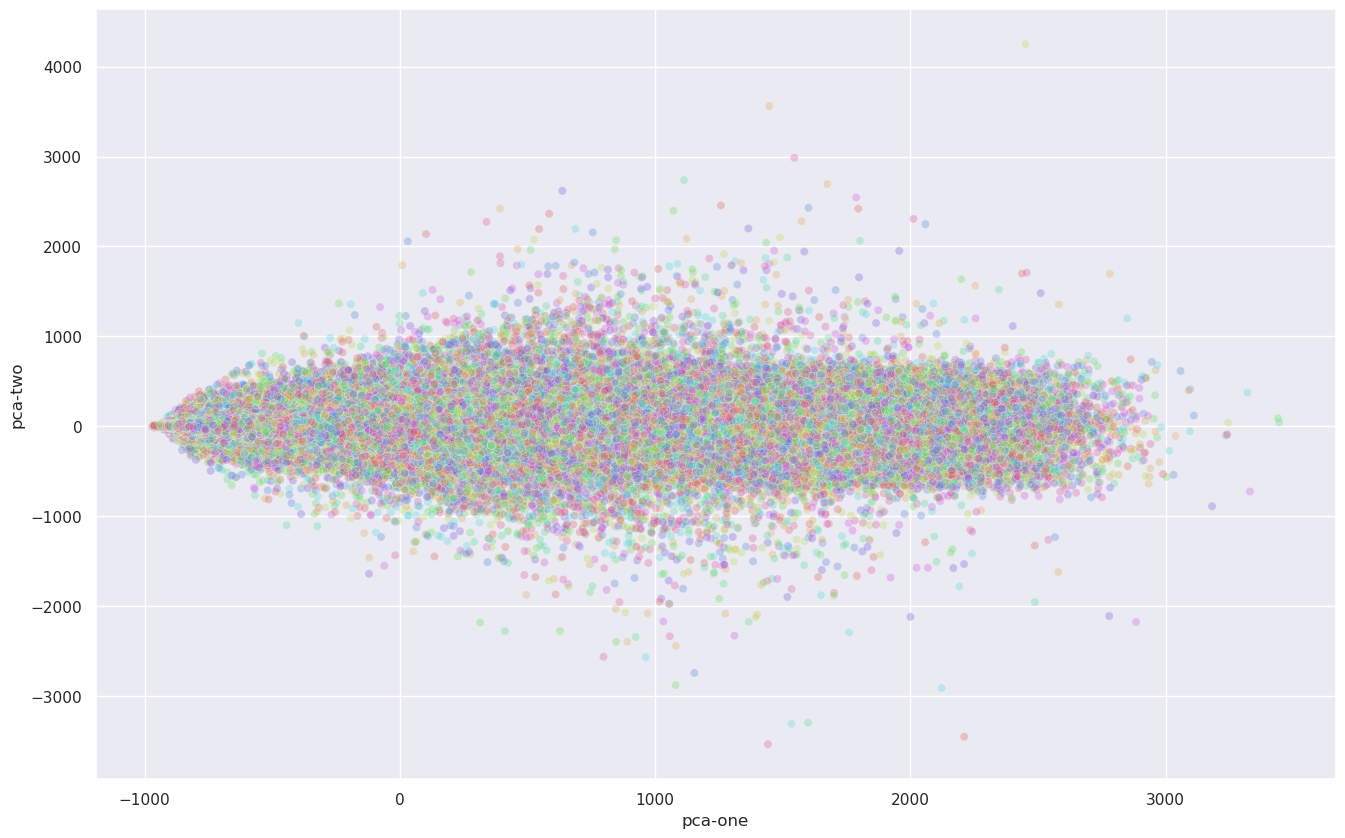

In [43]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="ID",
    palette=sns.color_palette("hls", 10),
    data=fulldf,
    legend = False,
    alpha=0.3
)

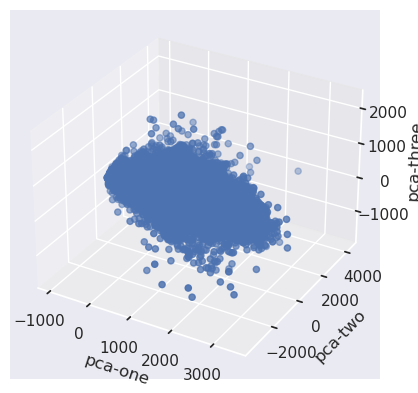

In [42]:
from mpl_toolkits.mplot3d import Axes3D
sns.set(style="darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

x = fulldf['pca-one'] 
y = fulldf['pca-two'] 
z = fulldf['pca-three']

ax.set_xlabel("pca-one")
ax.set_ylabel("pca-two")
ax.set_zlabel("pca-three")

ax.scatter(x,y,z)

plt.show()

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
dbscan = DBSCAN(eps = 11.75, min_samples = 1)

In [ ]:
model = dbscan.fit(fulldf[["pca-one","pca-two"]])

In [ ]:
clusters = pd.DataFrame(model.fit_predict(fulldf[["pca-one","pca-two"]]))

In [ ]:
fulldf["DBSCAN_Clusters"] = clusters

In [ ]:
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(fulldf["pca-one"],fulldf["pca-two"], c=fulldf["DBSCAN_Clusters"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

In [19]:
fulldf_new["DBSCAN_Clusters"].value_counts()

0       2433096
27          170
118          77
6            55
29           50
         ...   
1263          1
1262          1
1261          1
1260          1
2734          1
Name: DBSCAN_Clusters, Length: 2735, dtype: int64

In [35]:
contaminantsdf = fulldf[(fulldf["pca-two"]<-1300) & (fulldf["pca-two"]< 1400) | (fulldf["pca-one"]>2300)]
contaminantsdf

,Unnamed: 0,ID,length,AAAA,AAAC,AAAT,AAAG,AACA,AACC,AACT,...,GGGA,GGGC,GGGT,GGGG,pca-one,pca-two,pca-three,pca-four,pca-five,DBSCAN_Clusters
4955,0,m64045e_230302_170238/329510/ccs,18290,14,8,14,8,18,5,4,...,7,38,303,13,681.050696,-1816.436526,-334.618255,-334.618255,-334.618255,26
11878,0,m64045e_230302_170238/853125/ccs,43037,409,176,380,207,214,114,155,...,71,69,77,53,2355.198801,-514.212760,-83.595775,-83.595775,-83.595775,46
145659,0,m64045e_230302_170238/10683063/ccs,18672,3,6,6,4,6,1,23,...,4,22,21,11,564.320853,-1814.140006,102.526425,102.526425,102.526425,450
165245,0,m64045e_230302_170238/12124946/ccs,27731,90,70,113,74,82,41,77,...,22,72,25,15,1244.687824,-1622.486842,82.725426,82.725426,82.725426,502
234141,0,m64045e_230302_170238/17237216/ccs,21119,0,0,2,3,0,0,0,...,1,4,12,2,598.418091,-1438.223710,99.245036,99.245036,99.245036,697
238537,0,m64045e_230302_170238/17564353/ccs,31835,0,0,5,0,0,0,7,...,0,0,0,0,1414.640314,-1499.842575,961.787223,961.787223,961.787223,708
352578,0,m64045e_230302_170238/25690403/ccs,21329,0,0,19,0,0,0,3,...,0,0,0,0,926.983489,-1648.298498,92.920516,92.920516,92.920516,1021
470443,0,m64045e_230302_170238/34275524/ccs,17092,0,0,2,0,0,0,13,...,0,0,11,0,527.012084,-1306.713032,237.900476,237.900476,237.900476,1348
547351,0,m64045e_230302_170238/39913039/ccs,27140,60,17,66,49,36,27,21,...,30,582,49,25,989.181542,-1484.086111,254.593995,254.593995,254.593995,1531
573031,0,m64045e_230302_170238/41877970/ccs,27027,34,33,33,17,36,40,39,...,34,20,34,26,901.795273,-1475.211617,368.615746,368.615746,368.615746,1592


In [20]:
fulldf.to_csv("./tetranucleotide_read_count.csv")

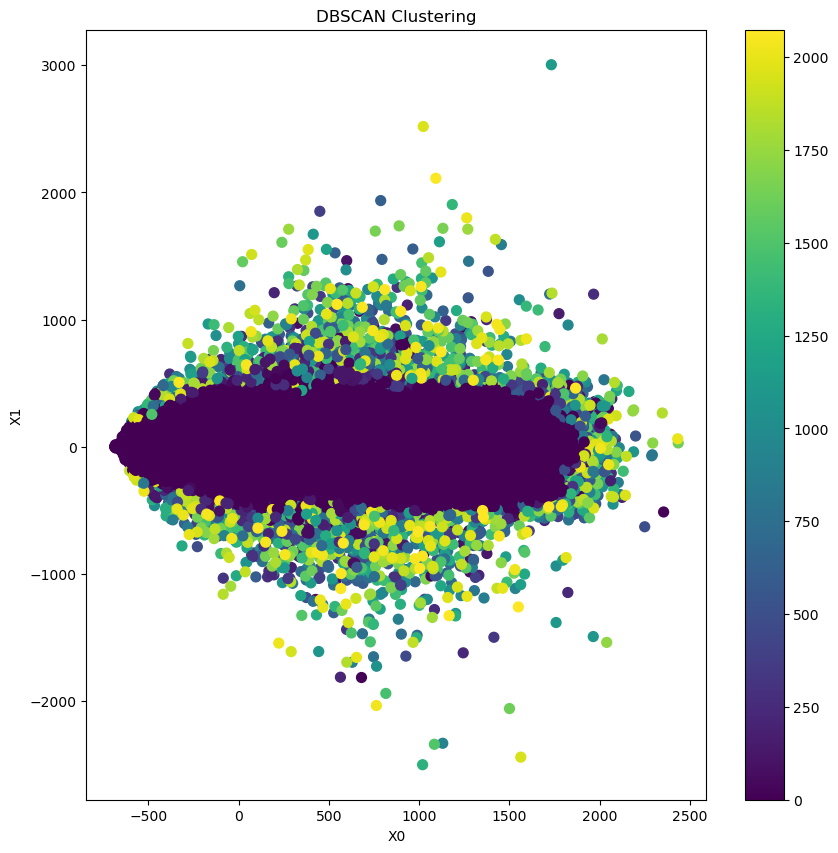

In [5]:
fulldf_new = pd.read_csv("./tetranucleotide_read_count_12_5.csv")
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(fulldf_new["pca-one"],fulldf_new["pca-two"], c=fulldf_new["DBSCAN_Clusters"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

In [6]:
fulldf_new["DBSCAN_Clusters"].value_counts()

0       2434715
54           49
7            47
49           37
120          28
         ...   
1110          1
290           1
1108          1
292           1
2074          1
Name: DBSCAN_Clusters, Length: 2075, dtype: int64

In [ ]:
#computational time for tsne was too long 

In [9]:
contaminants_data = fulldf_new[fulldf_new["DBSCAN_Clusters"] != 0]

In [11]:
cont_IDs = contaminants_data["ID"]

In [14]:
cont_IDs.to_csv("cont_IDs.csv", index = False)